<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/Decision%20Tree/DecisionTreeClassifier_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/MaxVieiraSantiago/Machine-Learning-Algorithms/master/Dataset/Risco_Credito_treino.csv'

dados = pd.read_csv( url )
dados.head()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
X = dados.drop( 'inadimplente', axis = 1)
y = dados['inadimplente']

## **Análise Exploratória dos Dados**

Text(0.5, 1.0, 'Target Variable Count')

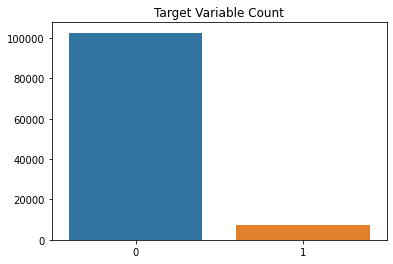

In [12]:
valores_X = dados['inadimplente'].value_counts().values
sns.barplot( x = [0,1], y= valores_X )
plt.title( 'Target Variable Count' )

In [13]:
total                        = dados.isnull().sum().sort_values( ascending = False )
percentual                   = ( dados.isnull().sum() / dados.isnull().count() *100 ).sort_values( ascending = False )
dados_treinamento_faltantes  = pd.concat( [ total, percentual ], axis=1, keys=[ 'Total', 'Percentual' ] )
dados_treinamento_faltantes.head(10)

,Total,Percentual
salario_mensal,21763,19.784545
numero_de_dependentes,2878,2.616364
inadimplente,0,0.000000
util_linhas_inseguras,0,0.000000
idade,0,0.000000
vezes_passou_de_30_59_dias,0,0.000000
razao_debito,0,0.000000
numero_linhas_crdto_aberto,0,0.000000
numero_vezes_passou_90_dias,0,0.000000
numero_emprestimos_imobiliarios,0,0.000000


## **Correlação**

O coeficiente de correlação não é o melhor método para representar a "relevância" de uma **feature**, mas nos dá uma ideia das possíveis relações dentro dos dados. Algumas interpretações gerais do valor absoluto do coeficiente de correlação são:

.**00-.19** “muito fraco”

.**20-.39** “fraco”

.**40-.59** “moderado”

.**60-.79** “forte”

.**0,80-1,0** “muito forte”

In [16]:
# Encontrar correlações com o target (y) e classificar
correlacao = dados.corr()['inadimplente'].sort_values(ascending = False)

In [19]:
# Apresentando correlações
print( 'Correlações mais positivas :\n', correlacao.head( 5 ) )
print( '\nCorrelações mais negativas:\n', correlacao.tail( 5 ) )

Correlações mais positivas :
 inadimplente                             1.000000
vezes_passou_de_30_59_dias               0.124546
numero_vezes_passou_90_dias              0.116023
numero_de_vezes_que_passou_60_89_dias    0.101536
numero_de_dependentes                    0.043079
Name: inadimplente, dtype: float64

Correlações mais negativas:
 razao_debito                      -0.006534
numero_emprestimos_imobiliarios   -0.008144
salario_mensal                    -0.020271
numero_linhas_crdto_aberto        -0.029332
idade                             -0.114281
Name: inadimplente, dtype: float64


Text(0.5, 1.0, 'Correlações - Heatmap')

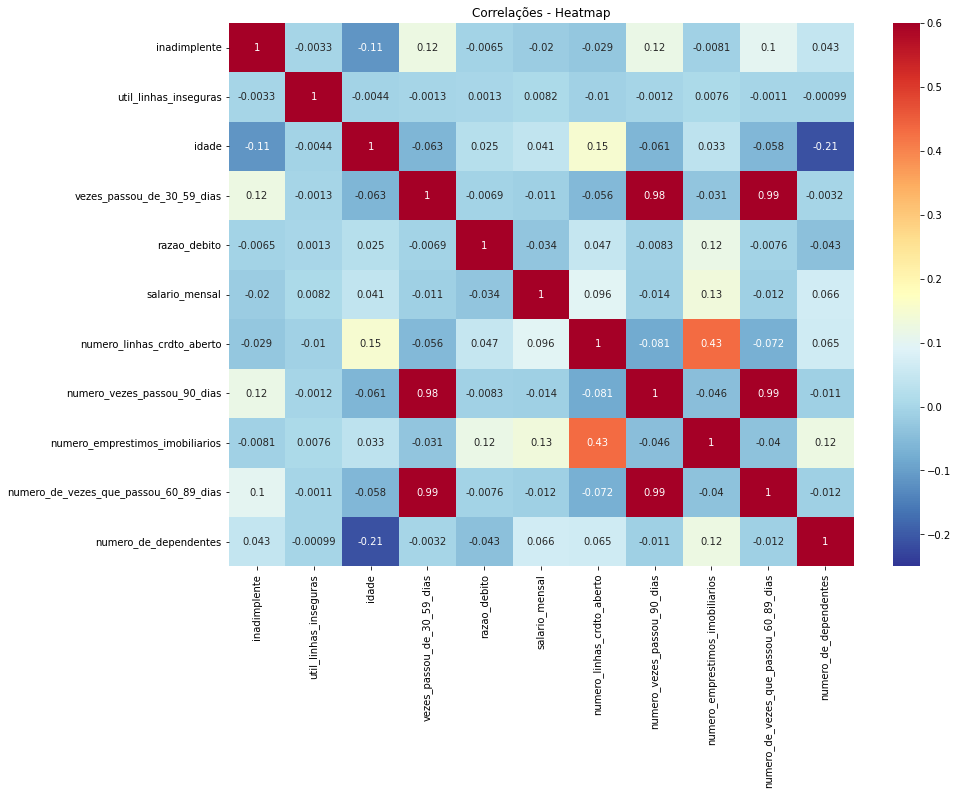

In [21]:
correlacao = dados.corr()
plt.figure( figsize=(14,10) )

# Maoa de calor das correações
sns.heatmap(  data = correlacao,  cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6 )
plt.title( 'Correlações - Heatmap' )

numero_vezes_passou_90_dias: **correlação muito forte**.

vezes_passou_de_30_59_dias: **correlação muito forte**.

numero_de_vezes_que_passou_60_89_dias: **correlação muito forte**.

numero_emprestimos_imobiliarios: **correlação moderada**.

idade mínima 0, idade máxima 109
idade < 20: 1, idade > 99: 10


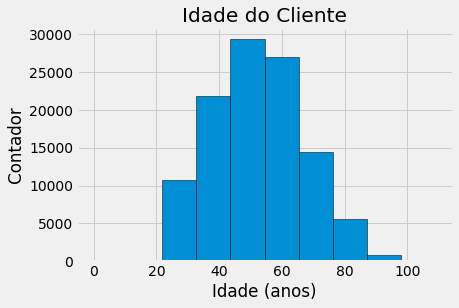

In [30]:
plt.style.use('fivethirtyeight')

# Plotar o histograma da distribuição das idades em anos
plt.hist( dados['idade'], edgecolor = 'k' )

plt.title( 'Idade do Cliente' )
plt.ylabel( 'Contador' )
plt.xlabel( 'Idade (anos)' )

print( 'idade mínima {}, idade máxima {}'.format( dados['idade'].min(), dados['idade'].max()) )
print( 'idade < 20: {}, idade > 99: {}'.format( len( dados[ dados['idade'] < 20 ] ), len( dados[ dados['idade'] > 99 ] ) ) )


In [ ]:
plt.figure( figsize=(10,8))
